In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "FRUIT-16K-PREPROCESSED/train/" # 80% of FRUIT-16K
test_dir = "FRUIT-16K-PREPROCESSED/test/" # 20% of FRUIT-16K

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 12800 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [2]:
checkpoint_filepath = 'tinyVGG_callbacks/'
tinyVGG_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)

In [3]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

In [4]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
tinyVGG = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(filters=10, 
						   kernel_size=3,
						   activation="relu", 
						   input_shape=(224, 224, 3)),
	tf.keras.layers.Conv2D(10, 3, activation="relu"),
	tf.keras.layers.MaxPool2D(pool_size=2,
							  padding="valid"),
	tf.keras.layers.Conv2D(10, 3, activation="relu"),
	tf.keras.layers.Conv2D(10, 3, activation="relu"),
	tf.keras.layers.MaxPool2D(2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(16, activation="softmax")
])

# Compile the model
tinyVGG.compile(loss="categorical_crossentropy",
				optimizer=tf.keras.optimizers.Adam(),
				metrics=["accuracy"])

# Fit the model
history_1 = tinyVGG.fit(train_data,
						epochs=10,
						validation_data=valid_data,
						validation_steps=len(valid_data),
						callbacks=[tinyVGG_checkpoint_callback,
								   early_stopping])

Epoch 1/10
400/400 [==============================] - 19s 40ms/step - loss: 1.5310 - accuracy: 0.5104 - val_loss: 0.9462 - val_accuracy: 0.7044
Epoch 2/10
400/400 [==============================] - 16s 41ms/step - loss: 0.6678 - accuracy: 0.7880 - val_loss: 0.7899 - val_accuracy: 0.7681
Epoch 3/10
400/400 [==============================] - 16s 40ms/step - loss: 0.4088 - accuracy: 0.8676 - val_loss: 0.4903 - val_accuracy: 0.8509
Epoch 4/10
400/400 [==============================] - 16s 41ms/step - loss: 0.2655 - accuracy: 0.9148 - val_loss: 0.5481 - val_accuracy: 0.8472
Epoch 5/10
400/400 [==============================] - 16s 40ms/step - loss: 0.2635 - accuracy: 0.9178 - val_loss: 0.5819 - val_accuracy: 0.8413
Epoch 6/10
400/400 [==============================] - 16s 40ms/step - loss: 0.1265 - accuracy: 0.9596 - val_loss: 0.5113 - val_accuracy: 0.8622


In [5]:
tinyVGG.load_weights(checkpoint_filepath)

In [ ]:
tinyVGG.save("tinyVGG.h5")

In [6]:
import matplotlib.pyplot as plt

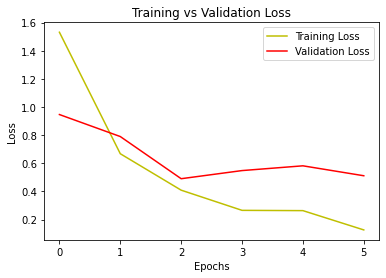

In [7]:
plt.plot(history_1.epoch, history_1.history["loss"], "y", label="Training Loss")
plt.plot(history_1.epoch, history_1.history["val_loss"], "r", label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

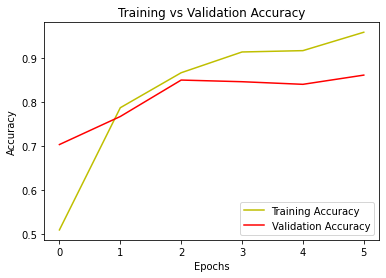

In [8]:
plt.plot(history_1.epoch, history_1.history["accuracy"], "y", label="Training Accuracy")
plt.plot(history_1.epoch, history_1.history["val_accuracy"], "r", label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()